In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [164]:
census_load = "2016 merged census data.csv"
census_df = pd.read_csv(census_load)
census_df.head()

,Zip Code,HC01_EST_VC02,HC01_EST_VC03,HC01_EST_VC04,HC01_EST_VC05,HC01_EST_VC06,HC01_EST_VC08,HC01_EST_VC09,HC01_EST_VC10,HC01_EST_VC11,...,HC03_VC89,HC01_VC120,HC03_VC120,HC01_VC121,HC01_VC122,HC01_VC124,HC01_VC125,HC01_VC126,HC03_VC161,HC03_VC171
0,78701,528,26,20,202,280,6570,138,135,468,...,89.9,3492,3492,85071,120606,78021,91610,76106,1.0,9.4
1,78702,1759,291,374,737,357,16244,2066,1485,3626,...,83.2,4505,4505,43795,60919,29484,40738,37091,22.5,24.8
2,78703,915,53,78,298,486,15824,144,110,510,...,89.5,5386,5386,58861,92640,56187,100238,62617,2.4,7.3
3,78704,4750,301,768,2409,1272,34620,1198,977,3498,...,89.7,15187,15187,52594,66571,37366,53928,46465,9.9,16.3
4,78705,24954,79,2680,20391,1804,6641,132,92,394,...,83.6,7141,7141,11724,29089,5914,33953,35255,28.7,64.9


In [165]:
crime_load = "2016 Austin crime data - clean.csv"
crime_df = pd.read_csv(crime_load)
crime_df.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Location Type,Zip Code,Latitude,Longitude,Location
0,2.016520e+09,traffic,2100,N,STREETS / HWY / ROAD / ALLEY,78753,30.370293,-97.683877,"(30.37029315, -97.68387677)"
1,2.016242e+10,traffic,2109,N,STREETS / HWY / ROAD / ALLEY,78704,30.228455,-97.767427,"(30.2284549, -97.76742683)"
2,2.016298e+10,traffic,2100,N,STREETS / HWY / ROAD / ALLEY,78701,30.264593,-97.744421,"(30.26459334, -97.74442064)"
3,2.016501e+10,financial,1199,N,RESIDENCE / HOME,78701,30.280296,-97.741746,"(30.28029596, -97.7417464)"
4,2.016780e+09,disturbances/mischief,3401,N,STREETS / HWY / ROAD / ALLEY,78701,30.267351,-97.739093,"(30.26735144, -97.73909331)"


In [166]:
# Calculate educational attainment rates
total_pop = census_df['HC01_EST_VC02'] + census_df['HC01_EST_VC08']
less_than_hs = census_df['HC01_EST_VC03'] + census_df['HC01_EST_VC09'] + census_df['HC01_EST_VC10']
hs_grad = census_df['HC01_EST_VC04'] + census_df['HC01_EST_VC11']
some_college = census_df['HC01_EST_VC05'] + census_df['HC01_EST_VC12'] + census_df['HC01_EST_VC13']
bachelor = census_df['HC01_EST_VC06'] + census_df['HC01_EST_VC14'] + census_df['HC01_EST_VC15']
edu_att = census_df ['Zip Code']
edu_df= pd.concat([edu_att,total_pop,less_than_hs,hs_grad,some_college,bachelor],axis=1)
edu_df.columns = ['Zip Code','Total Population (18+)','Less than HS Graduate', 'HS Graduate', 'Some College or Associates Degree', 'Bachelors Degree or Higher']
less_than_hs_rate = edu_df['Less than HS Graduate']/edu_df['Total Population (18+)']
hs_grad_rate = edu_df['HS Graduate']/edu_df['Total Population (18+)']
some_college_rate = edu_df['Some College or Associates Degree']/edu_df['Total Population (18+)']
bachelor_rate = edu_df['Bachelors Degree or Higher']/edu_df['Total Population (18+)']
edu_rates = pd.concat([edu_att,less_than_hs_rate,hs_grad_rate,some_college_rate,bachelor_rate],axis=1)
edu_rates.columns = ['Zip Code','Less than HS Graduate %', 'HS Graduate %', 'Some College %', 'Bachelors Degree or Higher %']
edu_rates.style.format({
    'Less than HS Graduate %': '{:,.2%}'.format,
    'HS Graduate %': '{:,.2%}'.format,
    'Some College %': '{:,.2%}'.format,
    'Bachelors Degree or Higher %' : '{:,.2%}'.format})

,Zip Code,Less than HS Graduate %,HS Graduate %,Some College %,Bachelors Degree or Higher %
0,78701,4.21%,6.88%,15.27%,73.64%
1,78702,21.34%,22.22%,22.10%,34.34%
2,78703,1.83%,3.51%,11.81%,82.84%
3,78704,6.29%,10.84%,24.83%,58.05%
4,78705,0.96%,9.73%,69.58%,19.73%
5,78721,29.06%,28.88%,22.13%,19.93%
6,78722,4.48%,13.40%,20.66%,61.46%
7,78723,18.39%,22.20%,24.99%,34.42%
8,78727,5.93%,15.37%,27.87%,50.83%
9,78730,2.23%,7.86%,22.60%,67.31%


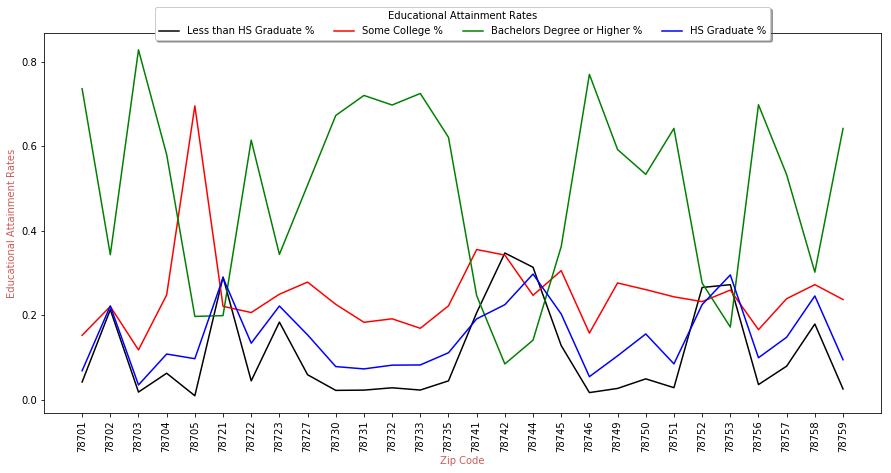

In [167]:
zipcode = edu_rates["Zip Code"]
x_pos = np.arange(len(zipcode))

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,7))
plt.plot(x_pos, edu_rates["Less than HS Graduate %"], color='k')
plt.plot(x_pos, edu_rates["Some College %"], color='r')
plt.plot(x_pos, edu_rates["Bachelors Degree or Higher %"], color='g')
plt.plot(x_pos, edu_rates["HS Graduate %"], color='b')
plt.xticks(x_pos, zipcode, rotation="vertical")
plt.ylabel('Educational Attainment Rates', color='indianred')
plt.xlabel('Zip Code', color='indianred')
lgnd=plt.legend(title="Educational Attainment Rates", loc = "upper right")
lgnd=plt.legend(title="Educational Attainment Rates", loc = 'upper center', bbox_to_anchor=(0.5, 1.08),
          ncol=4, fancybox=True, shadow=True)
plt.savefig("Educational Attainment.png")


In [168]:
# Calculate score and add rank based on score
edu_score = (edu_rates['Less than HS Graduate %'] *1)+(edu_rates['HS Graduate %'] *2)+(edu_rates['Some College %'] *3) + (edu_rates['Bachelors Degree or Higher %'] *4)
edu_rank = pd.concat([edu_att,edu_score],axis=1)
edu_rank.columns = ['Zip Code','EDU Total Score']
edu_rank['EDU Rank'] = edu_rank['EDU Total Score'].rank()
edu_rank.sort_values(by= ['EDU Rank'], ascending = False)

,Zip Code,EDU Total Score,EDU Rank
2,78703,3.756616,28.0
18,78746,3.681369,27.0
10,78731,3.601506,26.0
12,78733,3.596354,25.0
0,78701,3.583404,24.0
11,78732,3.558945,23.0
9,78730,3.549818,22.0
24,78756,3.526785,21.0
21,78751,3.500038,20.0
27,78759,3.496098,19.0


In [169]:
# Unemployment score based on civilian labor force - provided as rate
unemployment_rank = census_df ['HC03_VC12']
unemployment_ranking = pd.concat([edu_att,unemployment_rank],axis=1)
unemployment_ranking['Unemployment Rank'] = unemployment_ranking['HC03_VC12'].rank(ascending= False)
unemployment_ranking.sort_values(by= ['Unemployment Rank'], ascending = False)

,Zip Code,HC03_VC12,Unemployment Rank
24,78756,2.1,28.0
0,78701,2.5,27.0
2,78703,3.0,26.0
25,78757,3.2,25.0
3,78704,3.6,24.0
6,78722,3.7,22.5
18,78746,3.7,22.5
8,78727,3.8,20.5
10,78731,3.8,20.5
9,78730,4.0,19.0


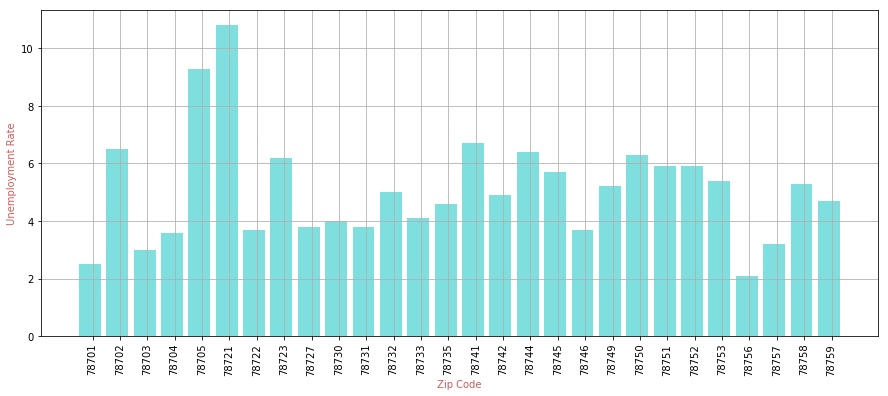

In [170]:
zipcode = unemployment_ranking["Zip Code"]
x_pos = np.arange(len(zipcode))
value = unemployment_ranking["HC03_VC12"]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,6))
plt.bar(x_pos, value, color='c', alpha=0.5, align="edge")
plt.xticks(x_pos+0.5, zipcode, rotation="vertical")
plt.ylabel('Unemployment Rate', color='indianred')
plt.xlabel('Zip Code', color='indianred')
plt.grid()
plt.savefig("UnemploymentRate.png")


In [171]:
# Income score based on ranges
income_lt_10K = census_df['HC03_VC75']    
income_10K_15K = census_df['HC03_VC76']
income_15K_25K= census_df['HC03_VC77']
income_25K_35K= census_df['HC03_VC78']
income_35K_50K= census_df['HC03_VC79']
income_50K_75K= census_df['HC03_VC80']
income_75K_100K= census_df['HC03_VC81']
income_100K_150K= census_df['HC03_VC82']
income_150K_200K= census_df['HC03_VC83']
income_over_200K= census_df['HC03_VC84']
income_rate = pd.concat([edu_att,income_lt_10K,income_10K_15K,income_15K_25K,income_25K_35K,income_35K_50K,income_50K_75K,
                     income_75K_100K,income_100K_150K,income_150K_200K,income_over_200K],axis=1)
income_rate.columns = ['Zip Code','< $10K','10K - 14,999','15K - 24,999','25K - 34,999','35K - 49,000','50K - 74,999',
                              '75K - 99,999', '100K - 149,999', '150K - 199,999', '> 200K']
income_score = (income_rate['< $10K']*1)+(income_rate['10K - 14,999']*2)+(income_rate['15K - 24,999']*3)+(income_rate['25K - 34,999']*4)+(income_rate['35K - 49,000']*5)+(income_rate['50K - 74,999']*6)+(income_rate['75K - 99,999']*7)+(income_rate['100K - 149,999']*8)+(income_rate['150K - 199,999']*9)+(income_rate['> 200K']*10)       
income_rate_w_score = pd.concat([income_rate,income_score],axis=1)
income_rate_w_score
income_rate_w_score.columns = ['Zip Code','< $10K','10K - 14,999','15K - 24,999','25K - 34,999','35K - 49,000','50K - 74,999',
                              '75K - 99,999', '100K - 149,999', '150K - 199,999', '> 200K','Income Score']
income_rate_w_score['Income Rank'] = income_rate_w_score['Income Score'].rank(ascending= True)
income_rate_w_score.sort_values(by= ['Income Rank'], ascending = False)

,Zip Code,< $10K,"10K - 14,999","15K - 24,999","25K - 34,999","35K - 49,000","50K - 74,999","75K - 99,999","100K - 149,999","150K - 199,999",> 200K,Income Score,Income Rank
11,78732,0.5,0.0,4.3,1.4,6.1,11.1,6.9,23.4,16.9,29.5,798.7,28.0
18,78746,2.1,1.1,3.1,2.7,6.0,11.4,11.6,17.3,10.2,34.4,778.2,27.0
12,78733,2.2,2.5,4.2,7.3,5.5,9.2,6.8,17.5,8.4,36.3,757.9,26.0
9,78730,2.2,1.7,1.8,3.8,10.4,19.0,8.1,14.7,6.1,32.2,743.4,25.0
0,78701,4.1,1.5,5.4,4.3,8.1,13.8,11.7,17.4,9.3,24.4,712.6,24.0
13,78735,3.4,3.9,5.0,5.6,4.9,16.8,12.4,17.1,11.2,19.7,695.3,23.0
2,78703,5.5,2.0,6.3,5.6,9.8,14.0,9.4,14.8,7.6,25.0,686.4,22.0
19,78749,2.6,1.8,2.9,3.8,12.0,17.6,16.0,24.7,11.0,7.6,680.3,21.0
10,78731,6.1,1.8,5.7,7.8,9.0,16.2,9.3,16.2,8.2,19.7,665.7,20.0
20,78750,2.8,1.5,6.0,8.2,10.2,19.0,13.3,15.5,9.8,13.6,662.9,19.0


In [172]:
# Income rank based on median income - Using table above in final calculation
median_income = census_df['HC01_VC85']
median_income_df = pd.concat([edu_att,median_income],axis=1)
median_income_df['Income Rank 2'] = median_income_df['HC01_VC85'].rank(ascending= True)
median_income_df.sort_values(by= ['Income Rank 2'], ascending = False)

,Zip Code,HC01_VC85,Income Rank 2
11,78732,138734,28.0
18,78746,132551,27.0
12,78733,129875,26.0
9,78730,105086,25.0
0,78701,102112,24.0
13,78735,94375,23.0
2,78703,92746,22.0
19,78749,87421,21.0
10,78731,83438,20.0
20,78750,79228,19.0


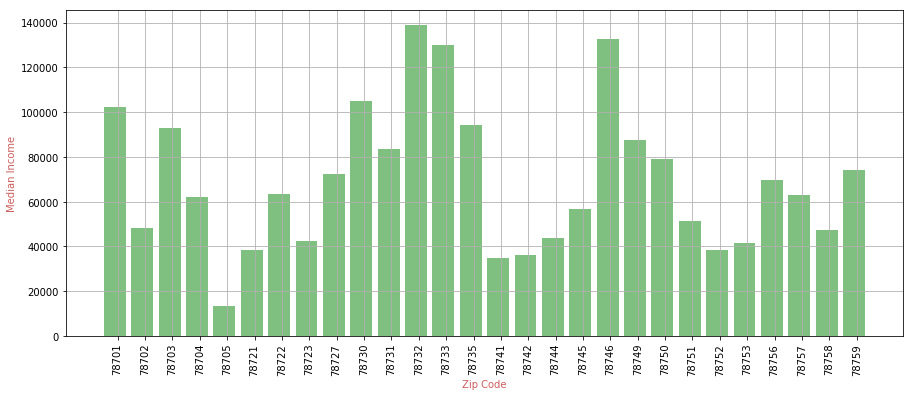

In [173]:
zipcode = median_income_df["Zip Code"]
x_pos = np.arange(len(zipcode))
value = median_income_df["HC01_VC85"]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,6))
plt.bar(x_pos, value, color='g', alpha=0.5, align="edge")
plt.xticks(x_pos+0.5, zipcode, rotation="vertical")
plt.ylabel('Median Income', color='indianred')
plt.xlabel('Zip Code', color='indianred')
plt.grid()
plt.savefig("Median Income.png")

In [174]:
# Poverty level for all people
poverty_level_people = census_df['HC03_VC171']
poverty_level_people_df = pd.concat([edu_att,poverty_level_people],axis=1)
poverty_level_people_df['Poverty Level Rank'] = poverty_level_people_df['HC03_VC171'].rank(ascending= False)
poverty_level_people_df.sort_values(by= ['Poverty Level Rank'], ascending = False)

,Zip Code,HC03_VC171,Poverty Level Rank
11,78732,1.1,28.0
12,78733,2.2,27.0
9,78730,4.0,26.0
18,78746,4.5,25.0
19,78749,5.0,24.0
27,78759,5.7,23.0
8,78727,6.2,22.0
2,78703,7.3,21.0
20,78750,7.4,20.0
13,78735,8.0,19.0


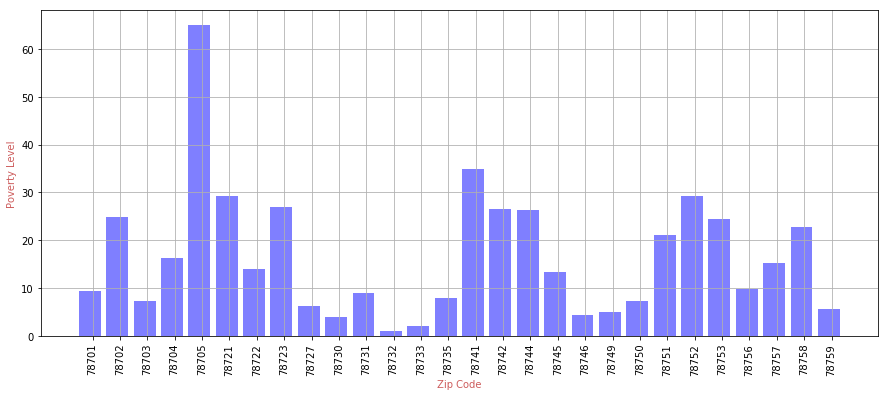

In [175]:
zipcode = poverty_level_people_df["Zip Code"]
x_pos = np.arange(len(zipcode))
value = poverty_level_people_df["HC03_VC171"]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,6))
plt.bar(x_pos, value, color='b', alpha=0.5, align="edge")
plt.xticks(x_pos+0.5, zipcode, rotation="vertical")
plt.ylabel('Poverty Level', color='indianred')
plt.xlabel('Zip Code', color='indianred')
plt.grid()
plt.savefig("Poverty Level All People.png")

In [176]:
# Poverty level for all families
poverty_level_families = census_df['HC03_VC161']
poverty_level_families_df = pd.concat([edu_att,poverty_level_families],axis=1)
poverty_level_families_df['Poverty Level Rank 2'] = poverty_level_families_df['HC03_VC161'].rank(ascending= False)
poverty_level_families_df.sort_values(by= ['Poverty Level Rank 2'], ascending = False)

,Zip Code,HC03_VC161,Poverty Level Rank 2
11,78732,0.0,28.0
0,78701,1.0,27.0
12,78733,1.6,26.0
9,78730,2.0,25.0
24,78756,2.1,24.0
2,78703,2.4,23.0
27,78759,2.6,22.0
18,78746,2.7,21.0
10,78731,3.4,20.0
19,78749,3.7,19.0


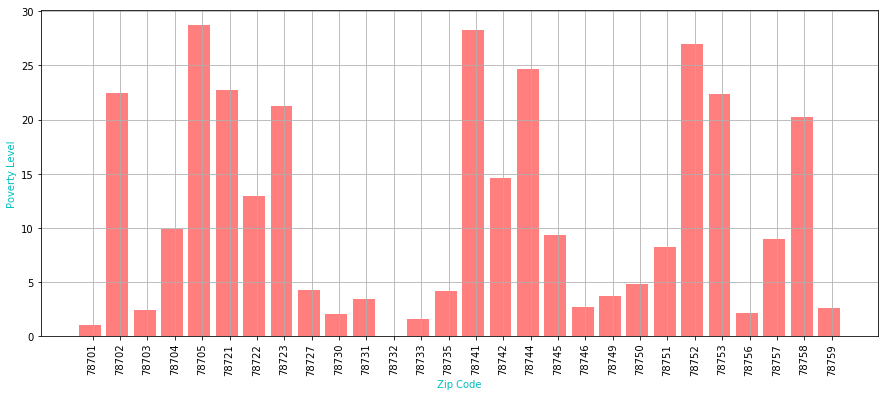

In [177]:
zipcode = poverty_level_families_df["Zip Code"]
x_pos = np.arange(len(zipcode))
value = poverty_level_families_df["HC03_VC161"]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,6))
plt.bar(x_pos, value, color='r', alpha=0.5, align="edge")
plt.xticks(x_pos+0.5, zipcode, rotation="vertical")
plt.ylabel('Poverty Level', color='c')
plt.xlabel('Zip Code', color='c')
plt.grid()
plt.savefig("Poverty Level All Families.png")

In [178]:
# Create blended poverty rate
blended_poverty_df = pd.merge(poverty_level_people_df, poverty_level_families_df, how="left", on=["Zip Code", "Zip Code"])
blended_poverty_rank = (blended_poverty_df['Poverty Level Rank'] + blended_poverty_df['Poverty Level Rank 2'])/2
blended_poverty_rank
blended_poverty_score = pd.concat([blended_poverty_df, blended_poverty_rank],axis=1)
blended_poverty_score.columns = ['Zip Code','Poverty Level- People', 'People Rank', 'Poverty Level- Families', 'Familes Rank', 'Blended Poverty Rank']
blended_poverty_score
blended_poverty_score.sort_values(by= ['Blended Poverty Rank'], ascending = False)

,Zip Code,Poverty Level- People,People Rank,Poverty Level- Families,Familes Rank,Blended Poverty Rank
11,78732,1.1,28.0,0.0,28.0,28.00
12,78733,2.2,27.0,1.6,26.0,26.50
9,78730,4.0,26.0,2.0,25.0,25.50
18,78746,4.5,25.0,2.7,21.0,23.00
27,78759,5.7,23.0,2.6,22.0,22.50
0,78701,9.4,17.0,1.0,27.0,22.00
2,78703,7.3,21.0,2.4,23.0,22.00
19,78749,5.0,24.0,3.7,19.0,21.50
24,78756,9.9,16.0,2.1,24.0,20.00
8,78727,6.2,22.0,4.3,17.0,19.50


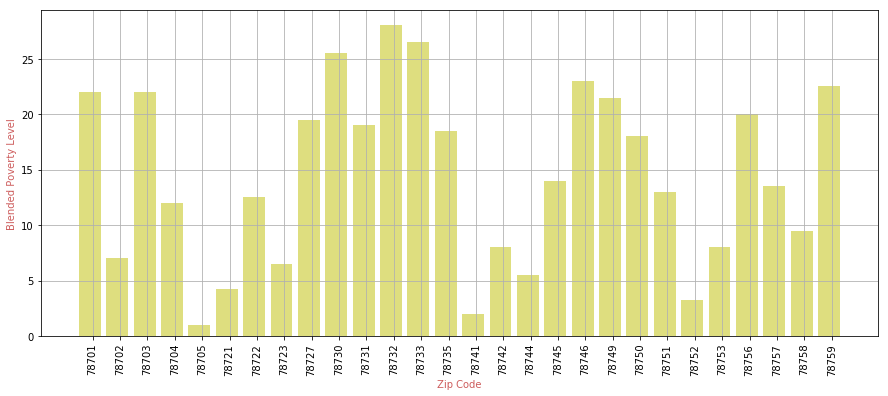

In [194]:
zipcode = blended_poverty_score["Zip Code"]
x_pos = np.arange(len(zipcode))
value = blended_poverty_score["Blended Poverty Rank"]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,6))
plt.bar(x_pos, value, color='y', alpha=0.5, align="edge")
plt.xticks(x_pos+0.5, zipcode, rotation="vertical")
plt.ylabel('Blended Poverty Level', color='indianred')
plt.xlabel('Zip Code', color='indianred')
plt.grid()
plt.savefig("Blended Poverty Level.png")

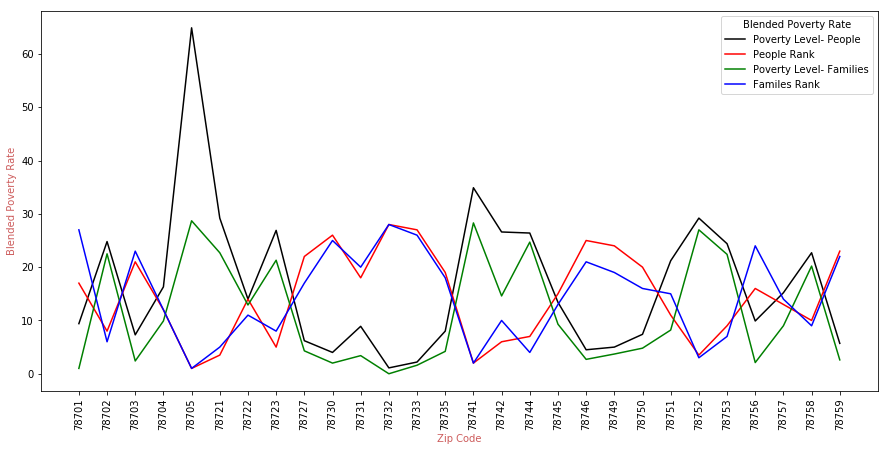

In [180]:
zipcode = blended_poverty_score["Zip Code"]
x_pos = np.arange(len(zipcode))

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,7))
plt.plot(x_pos, blended_poverty_score["Poverty Level- People"], color='k')
plt.plot(x_pos, blended_poverty_score["People Rank"], color='r')
plt.plot(x_pos, blended_poverty_score["Poverty Level- Families"], color='g')
plt.plot(x_pos, blended_poverty_score["Familes Rank"], color='b')
plt.xticks(x_pos, zipcode, rotation="vertical")
plt.ylabel('Blended Poverty Rate', color='indianred')
plt.xlabel('Zip Code', color='indianred')
lgnd=plt.legend(title="Blended Poverty Rate", loc = "upper right")
plt.savefig("Blended Poverty.png")


In [181]:
# Pull only ranks for merge on zip
only_EDU_ranks= edu_rank[['Zip Code','EDU Rank']]
only_unemployment_ranks=unemployment_ranking[['Zip Code','Unemployment Rank']]
only_income_rank = income_rate_w_score[['Zip Code','Income Rank']]
only_poverty_level_blended_rank = blended_poverty_score[['Zip Code','Blended Poverty Rank']]

In [182]:
# Merge all ranks
rank_merge = pd.merge(only_EDU_ranks, only_unemployment_ranks, how="left", on=["Zip Code", "Zip Code"])
rank_merge_1 = pd.merge(rank_merge, only_income_rank, how="left", on=["Zip Code", "Zip Code"])
rank_merge_2 = pd.merge(rank_merge_1, only_poverty_level_blended_rank, how="left", on=["Zip Code", "Zip Code"])
rank_merge_2

,Zip Code,EDU Rank,Unemployment Rank,Income Rank,Blended Poverty Rank
0,78701,24.0,27.0,24.0,22.00
1,78702,7.0,4.0,9.0,7.00
2,78703,28.0,26.0,22.0,22.00
3,78704,15.0,24.0,13.0,12.00
4,78705,11.0,2.0,1.0,1.00
5,78721,3.0,1.0,4.0,4.25
6,78722,16.0,22.5,14.0,12.50
7,78723,9.0,7.0,8.0,6.50
8,78727,13.0,20.5,16.0,19.50
9,78730,22.0,19.0,25.0,25.50


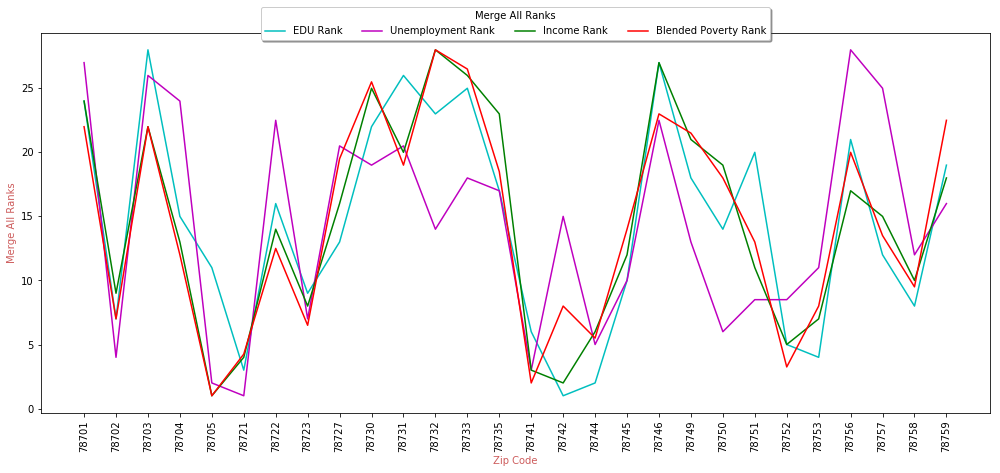

In [183]:
zipcode = rank_merge_2["Zip Code"]
x_pos = np.arange(len(zipcode))

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(17,7))
plt.plot(x_pos, rank_merge_2["EDU Rank"], color='c')
plt.plot(x_pos, rank_merge_2["Unemployment Rank"], color='m')
plt.plot(x_pos, rank_merge_2["Income Rank"], color='g')
plt.plot(x_pos, rank_merge_2["Blended Poverty Rank"], color='r')
plt.xticks(x_pos, zipcode, rotation="vertical")
plt.ylabel('Merge All Ranks', color='indianred')
plt.xlabel('Zip Code', color='indianred')
lgnd=plt.legend(title="Merge All Ranks", loc = "lower right")
lgnd=plt.legend(title="Merge All Ranks", loc = 'upper center', bbox_to_anchor=(0.5, 1.08),
          ncol=4, fancybox=True, shadow=True)
plt.savefig("Merge All Ranks.png")


In [184]:
# Calculate final score for each zip
total_score = (rank_merge_2['EDU Rank']+rank_merge_2['Unemployment Rank']+rank_merge_2['Income Rank']+rank_merge_2['Blended Poverty Rank'])/4
total_score_w_zip = pd.concat([edu_att,total_score],axis=1)
total_score_w_zip.round(decimals=2)
total_score_w_zip.columns = ['Zip Code','Total Score']
total_score_w_zip.sort_values(by= ['Total Score'], ascending = False)

,Zip Code,Total Score
18,78746,24.8750
2,78703,24.5000
0,78701,24.2500
12,78733,23.8750
11,78732,23.2500
9,78730,22.8750
24,78756,21.5000
10,78731,21.3750
13,78735,18.8750
27,78759,18.8750


In [185]:
# Zips in the top third
top_third= total_score_w_zip.loc[total_score_w_zip['Total Score'] > 20]
top_third

,Zip Code,Total Score
0,78701,24.250
2,78703,24.500
9,78730,22.875
10,78731,21.375
11,78732,23.250
12,78733,23.875
18,78746,24.875
24,78756,21.500


In [186]:
# Zips in middle third
middle_third= total_score_w_zip.loc[(total_score_w_zip['Total Score'] <= 20)&(total_score_w_zip['Total Score'] > 10)]
middle_third

,Zip Code,Total Score
3,78704,16.000
6,78722,16.250
8,78727,17.250
13,78735,18.875
17,78745,11.500
19,78749,18.375
20,78750,14.250
21,78751,13.125
25,78757,16.375
27,78759,18.875


In [187]:
# Zips in bottom third
bottom_third= total_score_w_zip.loc[total_score_w_zip['Total Score'] <= 10]
bottom_third

,Zip Code,Total Score
1,78702,6.7500
4,78705,3.7500
5,78721,3.0625
7,78723,7.6250
14,78741,3.5000
15,78742,6.5000
16,78744,4.6250
22,78752,5.4375
23,78753,7.5000
26,78758,9.8750


In [188]:
# Merge with Crime for Top Tier
crime_clean_df = crime_df[['Highest Offense Description', 'Zip Code']]
crime_and_groups_top = pd.merge(crime_clean_df, top_third, how="left", on=["Zip Code", "Zip Code"])
cg_top_dropped = crime_and_groups_top.dropna(axis=0, how='any')
top_crime_df = cg_top_dropped.groupby('Highest Offense Description').count()
top_crime = top_crime_df[["Total Score"]] 
top_crime.columns = ['Top Tier Count']
top_crime

,Top Tier Count
Highest Offense Description,
assault,1366
disturbances/mischief,2630
drug/alcohol,1765
family/children,82
financial,729
property crime,4383
sexual offense,71
statutory,1099
traffic,1226


In [189]:
# Merge with Crime for Mid Tier
crime_and_groups_middle = pd.merge(crime_clean_df, middle_third, how="left", on=["Zip Code", "Zip Code"])
crime_and_groups_middle
cg_mid_dropped = crime_and_groups_middle.dropna(axis=0, how='any')
middle_crime_df = cg_mid_dropped.groupby('Highest Offense Description').count()
middle_crime = middle_crime_df[["Total Score"]] 
middle_crime.columns = ['Mid Tier Count']
middle_crime

,Mid Tier Count
Highest Offense Description,
assault,3499
disturbances/mischief,7443
drug/alcohol,1708
family/children,1251
financial,1952
property crime,10049
sexual offense,143
statutory,871
traffic,2019


In [190]:
# Merge with Crime for Bottom Tier
crime_and_groups_bottom = pd.merge(crime_clean_df, bottom_third, how="left", on=["Zip Code", "Zip Code"])
crime_and_groups_bottom
cg_bottom_dropped = crime_and_groups_bottom.dropna(axis=0, how='any')
bottom_crime_df = cg_bottom_dropped.groupby('Highest Offense Description').count()
bottom_crime = bottom_crime_df[["Total Score"]] 
bottom_crime.columns = ['Bottom Tier Count']
bottom_crime




,Bottom Tier Count
Highest Offense Description,
assault,6576
disturbances/mischief,14649
drug/alcohol,4353
family/children,2189
financial,2321
property crime,16364
sexual offense,289
statutory,2175
traffic,3463


In [191]:
#Combine counts into one chart
counts_by_crime = pd.concat([top_crime,middle_crime, bottom_crime],axis=1)
counts_by_crime

,Top Tier Count,Mid Tier Count,Bottom Tier Count
Highest Offense Description,,,
assault,1366,3499,6576
disturbances/mischief,2630,7443,14649
drug/alcohol,1765,1708,4353
family/children,82,1251,2189
financial,729,1952,2321
property crime,4383,10049,16364
sexual offense,71,143,289
statutory,1099,871,2175
traffic,1226,2019,3463
